# Exploratory Data Analysis with Python and Pandas

## Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Link to data source: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?resource=download


**Data Dictionary**
1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C)

3. ***City:*** Location of supercenter

4. ***Customer Type:*** Type of customers, recorded as Members for customers using member card and Normal for customers without member card

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fasion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total***: Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available - Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer satisfaction rating on their overall shopping experience (On a scale of 1 to 10)

## Initial Data Exploration

In [108]:
df = pd.read_csv('../ashleybruggeman/downloads/supermarket_sales.csv')

In [109]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [110]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [111]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [112]:
df['Date'] = pd.to_datetime(df['Date'])

In [113]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Univariate Analysis

**Question 1:** What does the distribution of customer ratings look like? Is it skewed?

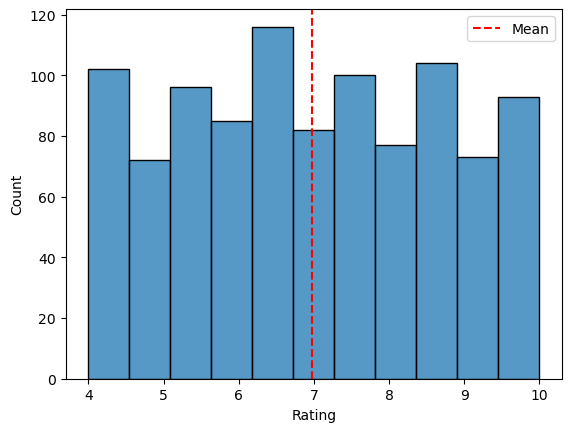

In [114]:
sns.histplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='Mean')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'cogs'}>],
       [<Axes: title={'center': 'gross margin percentage'}>,
        <Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

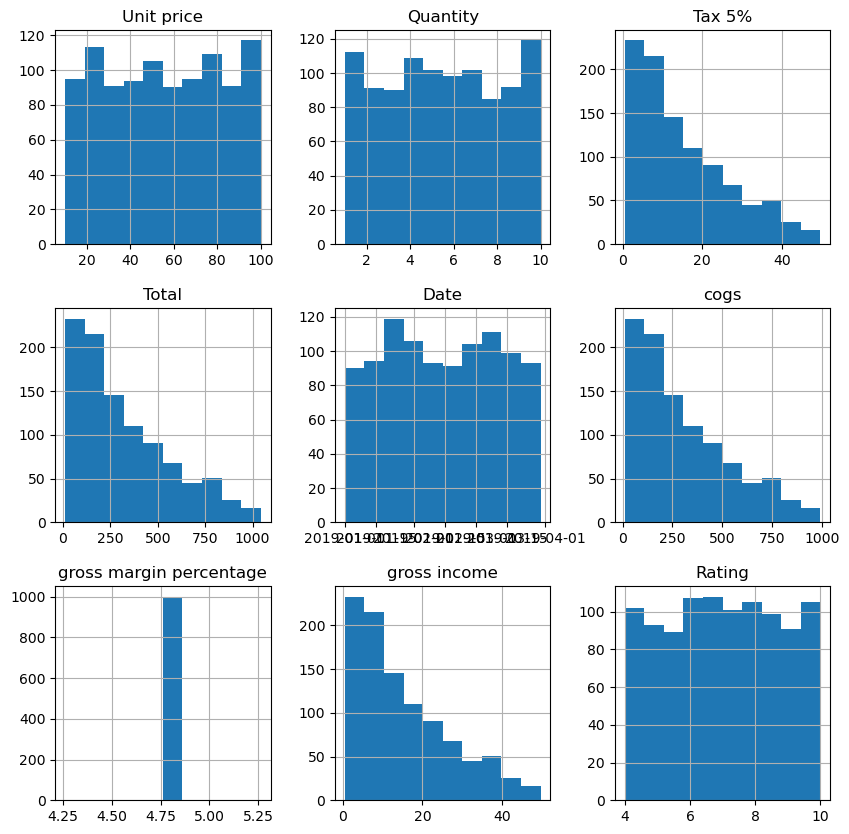

In [115]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ much between branches?

<Axes: xlabel='Branch', ylabel='count'>

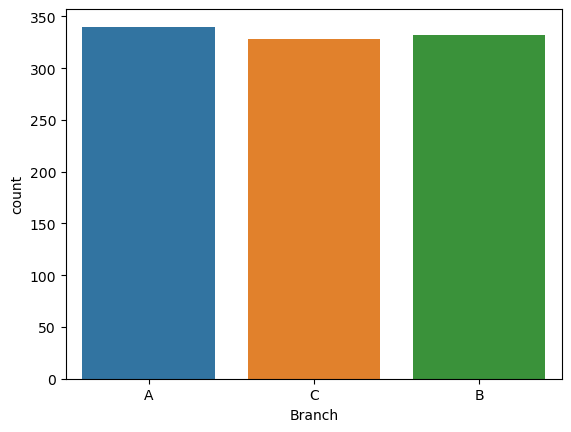

In [116]:
sns.countplot(x=df['Branch'])

In [117]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

## Bivariate Analysis

**Question 3:** Is there a relatioship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

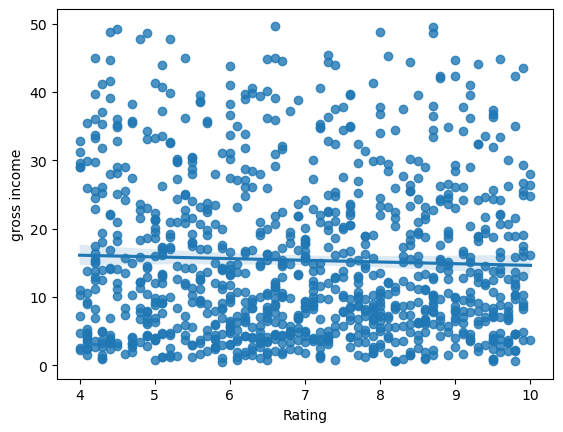

In [118]:
sns.regplot(data=df, x='Rating',y='gross income')

**Question 4:** Is there a relationship between Branch and Gross income?

<Axes: xlabel='Branch', ylabel='gross income'>

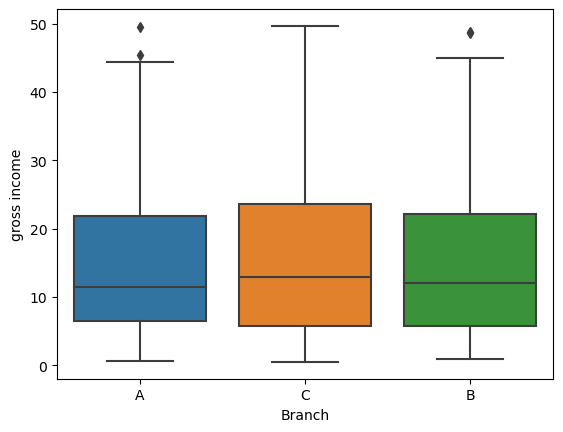

In [119]:
sns.boxplot(data=df, x='Branch', y='gross income')

**Question 5:** Is there a noticeable time trend in gross income?

In [120]:
df.groupby(df['Date']).mean()

/var/folders/47/s9hncskj7d55hq23z72qc5nw0000gn/T/ipykernel_7477/3163151296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['Date']).mean()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


/var/folders/47/s9hncskj7d55hq23z72qc5nw0000gn/T/ipykernel_7477/1441001236.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x=df.groupby(df['Date']).mean().index,
/var/folders/47/s9hncskj7d55hq23z72qc5nw0000gn/T/ipykernel_7477/1441001236.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=df.groupby(df['Date']).mean()['gross income'])


<Axes: xlabel='Date', ylabel='gross income'>

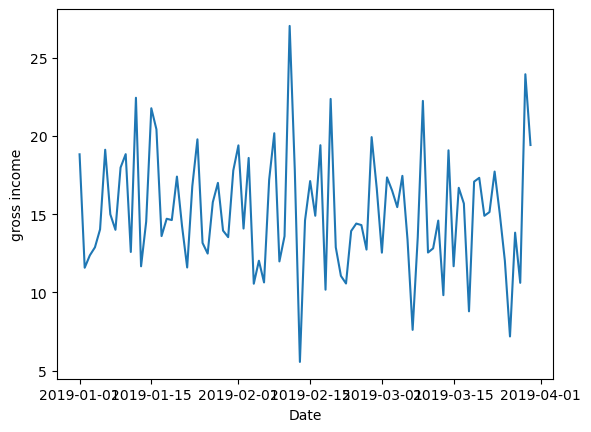

In [121]:
sns.lineplot(x=df.groupby(df['Date']).mean().index, 
             y=df.groupby(df['Date']).mean()['gross income'])

## Duplicate and Missing Values

In [122]:
df.duplicated().sum()

0

In [123]:
df = df.drop_duplicates()

In [124]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Correlation Analysis

In [125]:
round(np.corrcoef(df['Unit price'],df['Quantity'])[1][0],2)

0.01

There is no correlational relationship between Unit Price and Quantity.

In [126]:
np.round(df.corr(),2)

/var/folders/47/s9hncskj7d55hq23z72qc5nw0000gn/T/ipykernel_7477/1998717259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


/var/folders/47/s9hncskj7d55hq23z72qc5nw0000gn/T/ipykernel_7477/177320030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2),annot=True)


<Axes: >

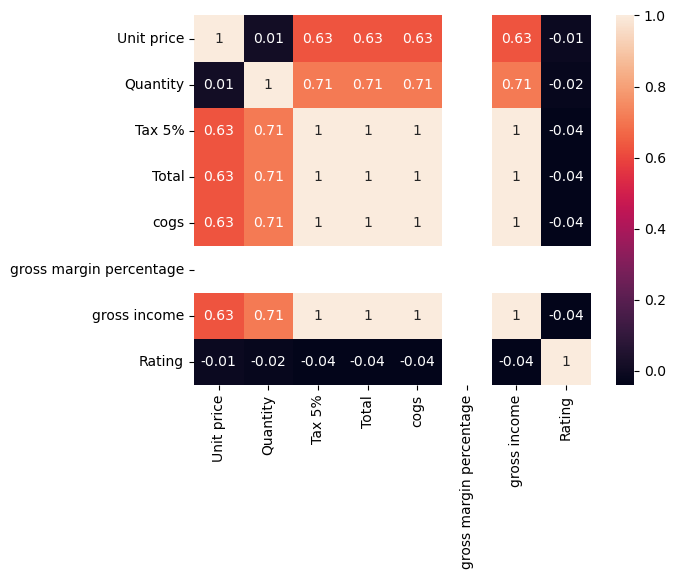

In [127]:
sns.heatmap(np.round(df.corr(),2),annot=True)